# MLP OPPE 2 Examination

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn import preprocessing as prep
from sklearn import model_selection as ms
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('v4.csv')
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation
0,low,med,3,6,med,med,good
1,low,med,2,4,small,med,acc
2,high,med,3,4,med,high,acc
3,med,low,4,4,big,high,vgood
4,vhigh,med,3,6,big,high,acc


## Que 1
Which dataset are you using for this exam?

In [3]:
# The dataset is v4.csv

## Que 2

Which of the columns in the dataset have null values?

In [4]:
# We can check this with df.info()
print(df.shape)
df.info()

(1500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1496 non-null   object
 1   Maint       1500 non-null   object
 2   Doors       1500 non-null   int64 
 3   Persons     1500 non-null   int64 
 4   Lug_boot    1500 non-null   object
 5   Safety      1500 non-null   object
 6   Evaluation  1500 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


So there are 1500 rows, and one column, 'Buying', has  1496 non-null values.

## Que 3

What are the unique Lug_boot values mentioned in the dataset?

In [5]:
df['Lug_boot'].unique()

array(['med', 'small', 'big'], dtype=object)

## Que 4

Divide the dataset into X and y, where the column 'Evaluation' goes to y (labels) and the rest of the columns go to X (feature matrix). What is the distribution of unacc and acc classes in y?

In [6]:
X = df.drop(['Evaluation'], axis=1)
y = df['Evaluation']

y.value_counts()

unacc    1039
acc       344
good       59
vgood      58
Name: Evaluation, dtype: int64

So the number of values for (unacc, acc) respectively are (1039, 344)

## Que 5

Apply SimpleImputer with strategy = 'most_frequent' to transform X. What is the data type of the transformed X?

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_imputed = imputer.fit_transform(X)

type(X_imputed)

numpy.ndarray

## Que 6

If the X obtained in the previous question has any datatype other than DataFrame, convert it into DataFrame with columns being `['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety']`. Do not change the order of the columns in X or order of column names. How many missing values are there in X now?

In [8]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
pd.isna(X_imputed).sum().sum()

0

Should be zero, since this is the output of the imputer!

## Que 7

Apply OneHotEncoder on the categorical features ['Buying', 'Maint', 'Lug_boot', 'Safety'] with option (sparse = False) and StandardScaler on the numerical features ['Doors', 'Persons'] of X. Let's call the outputs of the first and second operations respectively to be X1 and X2.

What are the data types of X1 and X2?

In [9]:
cats = ['Buying', 'Maint', 'Lug_boot', 'Safety']
nums = ['Doors', 'Persons']

ohe = prep.OneHotEncoder(sparse=False)
scaler = prep.StandardScaler()

X1 = ohe.fit_transform(X_imputed[cats])
X2 = scaler.fit_transform(X_imputed[nums])

type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

## Que 8

Concatenate X1 and X2 (in that order) and call it X.

Hint and note: Keep axis = 1.

Convert X to a dataframe. What is the shape of resultant X. Do not worry about the column names of this new dataframe.



In [10]:
X = np.c_[X1, X2]
X = pd.DataFrame(X)

X.shape

(1500, 16)

In [11]:
# Let's quickly verify this:

# The number of rows should be the same as the number of original rows
print("Number of rows is correct: ", len(X) == len(X_imputed))

# Number of columns should be the sum of number of unique categories in each categorial column
# + the number of numerical columns

n_categories = 0
for cat_feat in cats:
  n_categories += X_imputed[cat_feat].nunique()

# Add the number of numerical features
total_feats = n_categories + len(nums)

# Check the number of columns
print("Number of columns is correct: ", total_feats == X.shape[1])

Number of rows is correct:  True
Number of columns is correct:  True


## Que 9

Split the dataset into training and test dataset into 80:20 ratio while keeping random_state =32. what is the shape of the X_train dataset?

In [12]:
xtrain, xtest, ytrain, ytest = ms.train_test_split(X, y, test_size=0.2, random_state=32)
xtrain.shape

(1200, 16)

## Que 10

Instantiate a perceptron classifier with following parameters:
* random_state = 32 
* learning rate = 1 (eta0=1)
* Train for 10 iterations (epoch) (max_iter=10)
* Do not shuffle the dataset for each epoch (iteration).
* Use 20% of the data for validation fraction .
* Do not apply regularization.
* Set fit_intercept to be True,
* Set warm start to false .

Train the classifier on the training data.

What is the value of the coefficient of the 2nd feature for the first class. Note that the index of the classes and features start counting from 0.

In [13]:
# I'm assuming that early_stopping has to be True, otherwise validation fraction will not apply.

perc = lm.Perceptron(random_state=32, eta0=1, max_iter=10, shuffle=False,
                     alpha=0, early_stopping=True, validation_fraction=0.2,
                     fit_intercept=True, warm_start=False)
perc.fit(xtrain, ytrain)
perc.coef_.shape

(4, 16)

In [14]:
# So four classes (rows) and 16 features (columns)
# 2nd feature (column index 1) of first class (row index 0) would be:
perc.coef_[0, 1]

-2.0

## Que 11

Apply logistic regression using SGDClassifier on the training dataset (X_train and y_train). Use the following parameters:
* Apply appropriate loss value (i.e. log)
* apply ridge regularization,
* maximum number of passes over the training data is 10
* initial learning rate is 0.01,
* regularization rate value is 0.001,
* learning rate should not change during training.
* Take random_state=32.

Based on this operation, calculate and mark the correct value of mean accuracy computed from score(X_train,y_train) (Upto 4 decimal points) from the given set of options.

Note : Please ignore the convergence warning.

In [15]:
clf = lm.SGDClassifier(loss='log', penalty='l2', max_iter=10,
                       eta0=0.01, alpha=0.001, learning_rate='constant',
                       random_state=32)
clf.fit(xtrain, ytrain)
clf.score(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.8

## Que 12

Use LogisticRegression with RandomizedSearchCV for fitting on the training dataset. For Logistic regression,
* use Saga solver,
* random state to be equal to 32,
* tolerance for stopping criteria to be 1e-2, and
* maximum number of iterations taken for the solvers to converge to be 200.

* Penalties to be tried out are L1 and L2.
* Regularization strength (inverse of regularization rate) to be tried out is `[0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]`

Search best values of C and penalty and mark the correct option from the following statements. For randomizedsearchCV also, take random state = 32

In [16]:
# First build the classifier
clf = lm.LogisticRegression(solver='saga', random_state=32, tol=1e-2,
                            max_iter=200)

# Create the parameter distribution
param_dists = {
    'penalty': ['l1', 'l2'],
    'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
}

# Run the search
search = ms.RandomizedSearchCV(clf, param_dists, random_state=32, n_jobs=-1)
search.fit(xtrain, ytrain)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=32,
                                                solver='saga', tol=0.01),
                   n_jobs=-1,
                   param_distributions={'C': [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5,
                                              4],
                                        'penalty': ['l1', 'l2']},
                   random_state=32)

In [17]:
search.best_params_

{'C': 3.5, 'penalty': 'l2'}

## Que 13

Apply GridsearchCV and support vector classifier (SVC)

* `kernel':('linear', 'rbf')`
* `'C':[1, 10]` on the training dataset X_train, y_train and calculate the best value of C and kernel.

use random_state = 32 for SVC



In [18]:
# Create svc instance
from sklearn.svm import SVC

svc = SVC(random_state=32)

# Create the grid
grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10]
}

# Do the grid search
search = ms.GridSearchCV(svc, param_grid=grid, n_jobs=-1)
search.fit(xtrain, ytrain)

# See the best params
search.best_params_

{'C': 10, 'kernel': 'rbf'}

## Que 14

(Common Instruction for Q14 - Q15 )

Use grid search with cross validation (GridSearchCV) on training set with 
* KNeighborsClassifier as the estimator,
* 'accuracy' as scoring parameter,
* cv value as 4 and
* consider `[1,3,5,7]` as "number of neighbors" to be examined.

Consider following parameters for KNeighborsClassifier:
* Take metric as 'minkowski',
* Set P value as 2
keep other parameter value as default value.


What is the best value of K you obtained using above instructions?

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier
knn = KNeighborsClassifier(metric='minkowski', p=2)

# Make the grid and run search
grid = {
    'n_neighbors': [1, 3, 5, 7]
}
search = ms.GridSearchCV(knn, grid, scoring='accuracy', cv=4, n_jobs=-1)
search.fit(xtrain, ytrain)

# See the best params
search.best_params_

{'n_neighbors': 7}

## Que 15

What is the value of best accuracy score from grid search cv?


In [20]:
search.best_score_

0.91

## Que 16

Common Instructions for Q16-Q18

Train the model using Decision Tree Classifier on training set. Set following parameters:

* Take criterion as 'gini',
* Set strategy to choose the split at each node as 'random',
* minimum number of samples required to split an internal node = 5,
* min_impurity_decrease = 0.001,
* Use random_state = 32

What is the mean accuracy score on test data upto 3 decimal places?


In [21]:
from sklearn.tree import DecisionTreeClassifier

# Create the tree
tree = DecisionTreeClassifier(criterion='gini', splitter='random',
                              min_samples_split=5, min_impurity_decrease=0.001,
                              random_state=32)
tree.fit(xtrain, ytrain)

# mean accuracy score on test data
tree.score(xtest, ytest)

0.95

## Que 17

What is the resultant depth of the tree?

In [22]:
tree.tree_.max_depth

11

## Que 18

Visualize this tree model. What is the value of gini impurity at the right child of root?

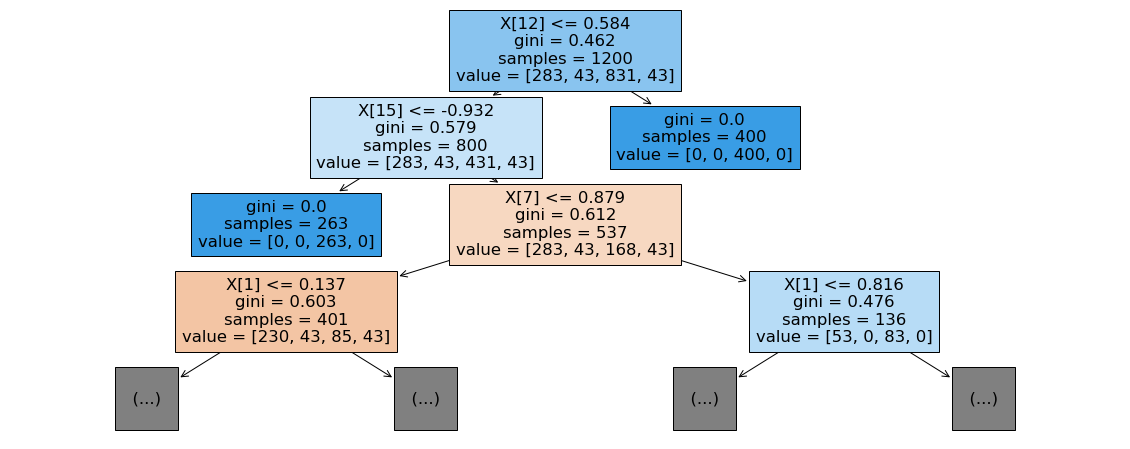

In [23]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 8))

# Limit the visualization to only a depth of 3,
# otherwise becomes too large and unreadable.
_ = plot_tree(tree, ax=ax, filled=True, impurity=True, max_depth=3)

## Que 19

Take RandomForestClassifier (random state to be 32) with GridSearchCV to tune the number of decision trees with training set. The number of trees in forest can range from 10 to 15 (both inclusive). Mark the number of decision trees that will produce the best score on the training data.

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=32)
grid = {
    'n_estimators': [10, 11, 12, 13, 14, 15]
}

search = ms.GridSearchCV(rfc, grid, n_jobs=-1)
search.fit(xtrain, ytrain)
search.best_params_

{'n_estimators': 14}

## Que 20

Train a separate BaggingClassifier on training set with each one of the following as base estimator:

* support vector classifier (SVC)
* LogisticRegression
* KNeighborsClassifier and
* DecisionTreeClassifier.

Measure accuracy score on test set with each of these bagging classifiers. Which base estimator yields the highest accuracy score on test data?

* Take random_state as 32 and n_estimators value as 15 for BaggingClassifier with each base estimator.
* Take random_state as 32 individually for each of the following: support vector classifier(SVC), DecisionTreeClassifier and LogisticRegression.

In [25]:
from sklearn.ensemble import BaggingClassifier

# Create the base estimators
bases = {
    'SVC': SVC(random_state=32),
    'LogisticRegression': lm.LogisticRegression(random_state=32),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(random_state=32)
}


for name, base in bases.items():
  bag = BaggingClassifier(base_estimator=base, n_estimators=15, random_state=32)
  bag.fit(xtrain, ytrain)
  print(name, bag.score(xtest, ytest))

SVC 0.9533333333333334
LogisticRegression 0.81
knn 0.9266666666666666
tree 0.97


In [26]:
# Seems like the decision tree is the best.